這次選擇的主題是Spaceship Titanic

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv("space_train.csv")

再利用seaborn的資料圖形觀察決定將name, cabin, vip移出這一次要預測的訓練模型(較沒有關連性)

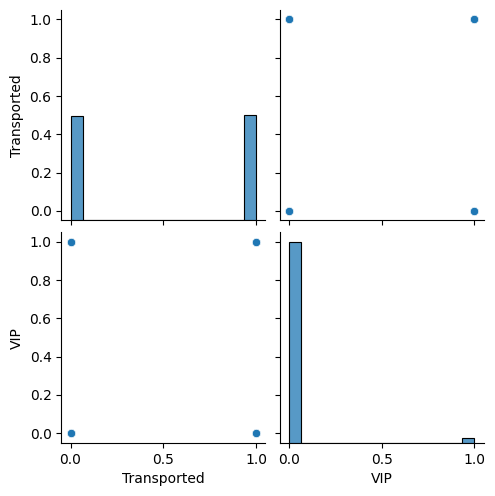

In [3]:
sns.pairplot(df[['Transported','VIP']],dropna=True)

In [4]:
df.drop(['Name','Cabin','VIP'],axis=1,inplace=True)

再將Transported當作觀察判斷

In [8]:
df.groupby('Transported').mean(numeric_only=True)

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
Transported,,,,,,
False,29.922858,389.266066,382.615930,167.566217,564.382666,543.629822
True,27.748834,63.098021,532.691984,179.829972,61.675531,69.148131


尋找空值

In [9]:
df.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Destination     182
Age             179
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Transported       0
dtype: int64

在Age中，我決定利用現有資料的平均來彌補空值，而其他利用中位數或著最常出現的值作為彌補值。

In [10]:
df['Age'].fillna(29 ,inplace = True)

df['HomePlanet'].fillna(df['HomePlanet'].value_counts().idxmax(),inplace=True)
df['CryoSleep'].fillna(df['CryoSleep'].value_counts().idxmax(),inplace=True)
df['Destination'].fillna(df['Destination'].value_counts().idxmax(),inplace=True)
df['RoomService'].fillna(df['RoomService'].value_counts().median(),inplace=True)
df['FoodCourt'].fillna(df['FoodCourt'].value_counts().median(),inplace=True)
df['ShoppingMall'].fillna(df['ShoppingMall'].value_counts().median(),inplace=True)
df['Spa'].fillna(df['Spa'].value_counts().median(),inplace=True)
df['VRDeck'].fillna(df['VRDeck'].value_counts().median(),inplace=True)

接下來按照講義建立預測模型

In [11]:
df=pd.get_dummies(data=df, dtype=int, columns=['HomePlanet','Destination'])
df.head()
df=pd.get_dummies(data=df, dtype=int, columns=['CryoSleep'])

In [13]:
df.corr()

,PassengerId,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,CryoSleep_False,CryoSleep_True
PassengerId,1.000000,-0.009370,0.000372,-0.009200,0.017792,-0.005198,0.015943,0.021491,0.002833,0.004946,-0.008802,-0.001458,0.013533,-0.007238,0.006883,-0.006883
Age,-0.009370,1.000000,0.068402,0.127338,0.032816,0.121081,0.099545,-0.074249,-0.201134,0.217450,0.016105,0.016698,-0.028258,0.003024,0.070680,-0.070680
RoomService,0.000372,0.068402,1.000000,-0.015128,0.052341,0.009247,-0.018625,-0.241129,-0.140482,-0.066639,0.245224,-0.023445,-0.063352,0.060682,0.244090,-0.244090
FoodCourt,-0.009200,0.127338,-0.015128,1.000000,-0.013719,0.221466,0.224571,0.045585,-0.215062,0.365103,-0.124755,0.134952,-0.065400,-0.078269,0.205928,-0.205928
ShoppingMall,0.017792,0.032816,0.052341,-0.013719,1.000000,0.014538,-0.007846,0.009395,-0.071910,-0.021154,0.111652,-0.013737,-0.031246,0.031854,0.207791,-0.207791
Spa,-0.005198,0.121081,0.009247,0.221466,0.014538,1.000000,0.147659,-0.218546,-0.159120,0.266105,-0.087990,0.075097,-0.053303,-0.032898,0.198307,-0.198307
VRDeck,0.015943,0.099545,-0.018625,0.224571,-0.007846,0.147659,1.000000,-0.204874,-0.154063,0.282555,-0.111863,0.089668,-0.044863,-0.051118,0.192723,-0.192723
Transported,0.021491,-0.074249,-0.241129,0.045585,0.009395,-0.218546,-0.204874,1.000000,-0.168845,0.176916,0.019544,0.108722,0.000092,-0.096319,-0.460132,0.460132
HomePlanet_Earth,0.002833,-0.201134,-0.140482,-0.215062,-0.071910,-0.159120,-0.154063,-0.168845,1.000000,-0.633221,-0.559658,-0.156169,0.231177,-0.007418,0.107231,-0.107231
HomePlanet_Europa,0.004946,0.217450,-0.066639,0.365103,-0.021154,0.266105,0.282555,0.176916,-0.633221,1.000000,-0.287022,0.293517,-0.163308,-0.156958,-0.093395,0.093395


In [14]:


X=df.drop(['Transported'],axis=1)
y=df['Transported']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=67)

In [15]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(max_iter=200)
lr.fit(X_train,y_train)
predictions=lr.predict(X_test)

In [16]:
predictions

array([False,  True, False, ...,  True,  True, False])

In [17]:
from sklearn.metrics import confusion_matrix,accuracy_score, recall_score, precision_score
accuracy_score(y_test,predictions)
recall_score(y_test,predictions)
precision_score(y_test,predictions)

0.7291280148423006

In [18]:
pd.DataFrame(confusion_matrix(y_test,predictions),columns=['Predict not Transported', 'Predict Transported'],index=['True not Transported','True Transported'])

,Predict not Transported,Predict Transported
True not Transported,858,438
True Transported,133,1179


In [19]:
import joblib
joblib.dump(lr,'space-lr-20231113.pkl',compress=3)

['space-lr-20231113.pkl']

輸出預測模型後，修改測值數據集以套用模型

In [20]:
import joblib
model_pretrained = joblib.load('space-lr-20231113.pkl')
import pandas as pd
df_test = pd.read_csv("test.csv")

In [21]:
df_test.drop(['Name','Cabin','VIP'],axis=1,inplace=True)

In [22]:
df_test['Age'].fillna(29 ,inplace = True)

df_test['HomePlanet'].fillna(df_test['HomePlanet'].value_counts().idxmax(),inplace=True)
df_test['CryoSleep'].fillna(df_test['CryoSleep'].value_counts().idxmax(),inplace=True)
df_test['Destination'].fillna(df_test['Destination'].value_counts().idxmax(),inplace=True)
df_test['RoomService'].fillna(df_test['RoomService'].value_counts().median(),inplace=True)
df_test['FoodCourt'].fillna(df_test['FoodCourt'].value_counts().median(),inplace=True)
df_test['ShoppingMall'].fillna(df_test['ShoppingMall'].value_counts().median(),inplace=True)
df_test['Spa'].fillna(df_test['Spa'].value_counts().median(),inplace=True)
df_test['VRDeck'].fillna(df_test['VRDeck'].value_counts().median(),inplace=True)


In [23]:
df_test=pd.get_dummies(data=df_test, dtype=int, columns=['HomePlanet','Destination','CryoSleep'])

predictions2=model_pretrained.predict(df_test)
predictions2

array([ True, False,  True, ...,  True,  True,  True])

設定預測結果參數並輸出結果

In [25]:
forSubmissionDF=pd.DataFrame(columns=['PassengerId','Transported'])
forSubmissionDF['PassengerId']=df_test.PassengerId
forSubmissionDF['Transported']=predictions2
forSubmissionDF
forSubmissionDF.to_csv('for_submission_20231113.csv', index=False)


![jupyter](./092737.png)